<a href="https://colab.research.google.com/github/YoonSungLee/AI-Innovation-Square_Vision/blob/master/Day%203_MNIST%20%EB%B6%84%EB%A5%98%20%EB%AC%B8%EC%A0%9C%20%EC%8B%A4%EC%8A%B5%20%EB%B0%8F%20%ED%95%99%EC%8A%B5%20%EA%B3%BC%EC%A0%95%20%EC%9D%B4%ED%95%B4/IMDB_classification_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import numpy as np
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [2]:
pip install numpy==1.16.1

     |████████████████████████████████| 17.3MB 1.2MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.17.5
    Uninstalling numpy-1.17.5:
      Successfully uninstalled numpy-1.17.5


In [3]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [5]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(25000,) (25000,)
(25000,) (25000,)


In [4]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
print(train_data)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [8]:
print(train_labels)

[1 0 0 ... 0 1 0]


In [0]:
# 문장을 벡터화하는 함수

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    print (results.shape)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스들의 위치를 1로 만듭니다
    return result

In [0]:
# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

(25000, 10000)
(25000, 10000)


In [0]:
# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
print(y_train[:10]) # 레이블의 불명확성 존재(긍정과 부정의 기준?))

[1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]


In [0]:
# Data split

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 1s 1us/step


In [0]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
# Build Model

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
# Model Compile

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

In [0]:
# Model Training and save training history

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))




Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 2s 158us/step - loss: 0.1791 - acc: 0.7831 - val_loss: 0.1350 - val_acc: 0.8528
Epoch 2/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.0968 - acc: 0.9032 - val_loss: 0.0971 - val_acc: 0.8871
Epoch 3/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.0660 - acc: 0.9325 - val_loss: 0.0910 - val_acc: 0.8825
Epoch 4/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.0525 - acc: 0.9440 - val_loss: 0.0872 - val_acc: 0.8833
Epoch 5/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.0416 - acc: 0.9563 - val_loss: 0.0856 - val_acc: 0.8814
Epoch 6/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.0338 - acc: 0.9669 - val_loss: 0.0897 - val_acc: 0.8780
Epoch 7/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.0262 - acc: 0.9769 - val_loss: 0

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

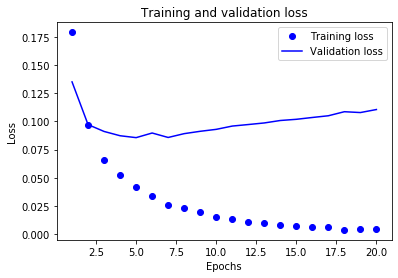

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

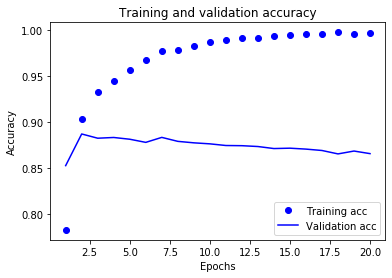

In [0]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 3s 111us/step - loss: 0.4737 - acc: 0.8219
Epoch 2/4
25000/25000 [==============================] - 3s 113us/step - loss: 0.2674 - acc: 0.9091
Epoch 3/4
25000/25000 [==============================] - 3s 111us/step - loss: 0.2033 - acc: 0.9281
Epoch 4/4
25000/25000 [==============================] - 2s 70us/step


In [0]:
result = model.predict(x_test)

In [0]:
result

array([[0.16195428],
       [0.99985003],
       [0.3976932 ],
       ...,
       [0.0823898 ],
       [0.04917434],
       [0.46394154]], dtype=float32)

In [0]:
#  thresholding

for i in range(len(result)):
  if result[i] > 0.5:
    result[i] = 1
  else:
    result[i] = 0
  


In [0]:
result

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

# Softmax

* 이진분류문제를 효과적으로 해결하는 방법
* 출력값을 2개로 설정해서 마지막 layer의 activation function을 softmax로 설정

In [0]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [0]:
# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

(25000, 10000)
(25000, 10000)


In [0]:
# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
# Data split

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
y_val = y_val.reshape(len(y_val), 1)
partial_y_train = partial_y_train.reshape(len(partial_y_train), 1)

In [0]:
from sklearn.preprocessing import OneHotEncoder
enc1 = OneHotEncoder()
enc1.fit(y_val)
y_val = enc1.transform(y_val).toarray()

enc2 = OneHotEncoder()
enc2.fit(partial_y_train)
partial_y_train = enc2.transform(partial_y_train).toarray()

In [0]:
# from keras.utils import to_categorical

# partial_y_train = to_categorical(partial_y_train)
# y_val = to_categorical(y_val)

In [0]:
model_softmax = models.Sequential()
model_softmax.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_softmax.add(layers.Dense(16, activation='relu'))
model_softmax.add(layers.Dense(2, activation='softmax'))

In [0]:
# Model Compile

model_softmax.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Model Training and save training history

history = model_softmax.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.5072 - acc: 0.7682 - val_loss: 0.3625 - val_acc: 0.8780
Epoch 2/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.2848 - acc: 0.9074 - val_loss: 0.3082 - val_acc: 0.8800
Epoch 3/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.2100 - acc: 0.9312 - val_loss: 0.3127 - val_acc: 0.8727
Epoch 4/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.1601 - acc: 0.9475 - val_loss: 0.2844 - val_acc: 0.8880
Epoch 5/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.1356 - acc: 0.9541 - val_loss: 0.2885 - val_acc: 0.8884
Epoch 6/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.1105 - acc: 0.9652 - val_loss: 0.3039 - val_acc: 0.8843
Epoch 7/20
15000/15000 [====

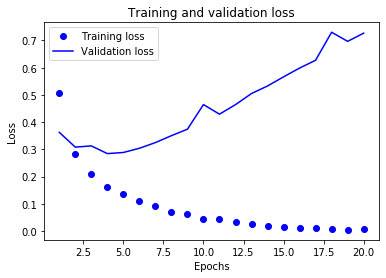

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

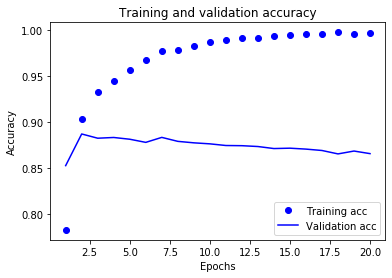

In [0]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()